In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, datasets, decomposition, preprocessing
sns.set()

In [ ]:
iris = datasets.load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns], 'target': 0      

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris["target"], iris["target_names"]

(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: target, Length: 150, dtype: int64,
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [ ]:
iris_data = iris["data"]
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris_data["species"] = [iris["target_names"][sp] for sp in iris["target"]]
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Size and missingness
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Central Tendency, Variability
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
iris_data.groupby("species").agg(["mean", "median", "std"])

sepal length (cm)                  sepal width (cm)         \
                        mean median       std             mean median   
species                                                                 
setosa                 5.006    5.0  0.352490            3.428    3.4   
versicolor             5.936    5.9  0.516171            2.770    2.8   
virginica              6.588    6.5  0.635880            2.974    3.0   

                     petal length (cm)                  petal width (cm)  \
                 std              mean median       std             mean   
species                                                                    
setosa      0.379064             1.462   1.50  0.173664            0.246   
versicolor  0.313798             4.260   4.35  0.469911            1.326   
virginica   0.322497             5.552   5.55  0.551895            2.026   

                             
           median       std  
species                      
setosa        0.2  0.105386  
versicolor    1.3  0.197753  
virginica     2.0  0.274650

In [ ]:
iris_data[iris_data.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
142,5.8,2.7,5.1,1.9,virginica


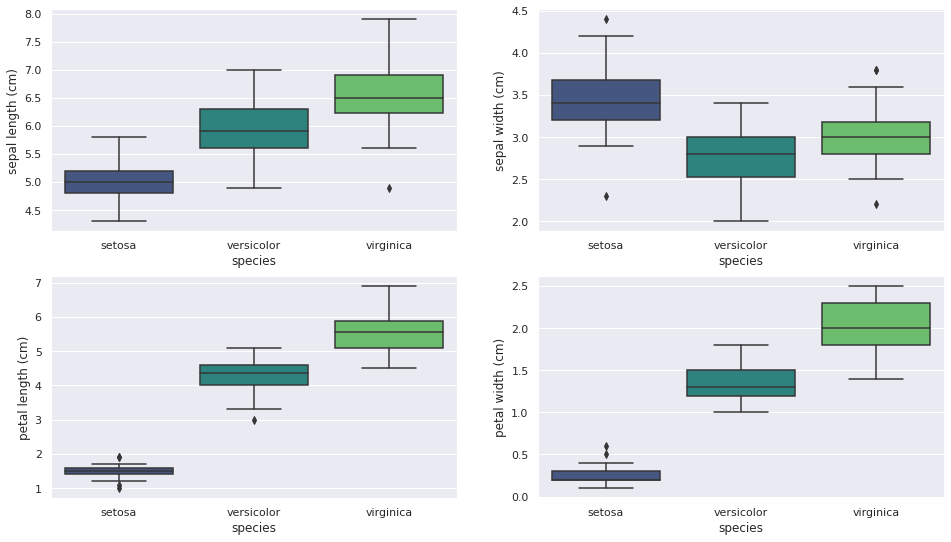

In [ ]:
# Univariate analysis
fig, axes = plt.subplots(2, 2, figsize=(16,9))
for i in range(2):
  for j in range(2):
    sns.boxplot(y=iris["feature_names"][2 * i + j], x="species", data=iris_data, orient="v", ax=axes[i, j], palette="viridis")
plt.show()

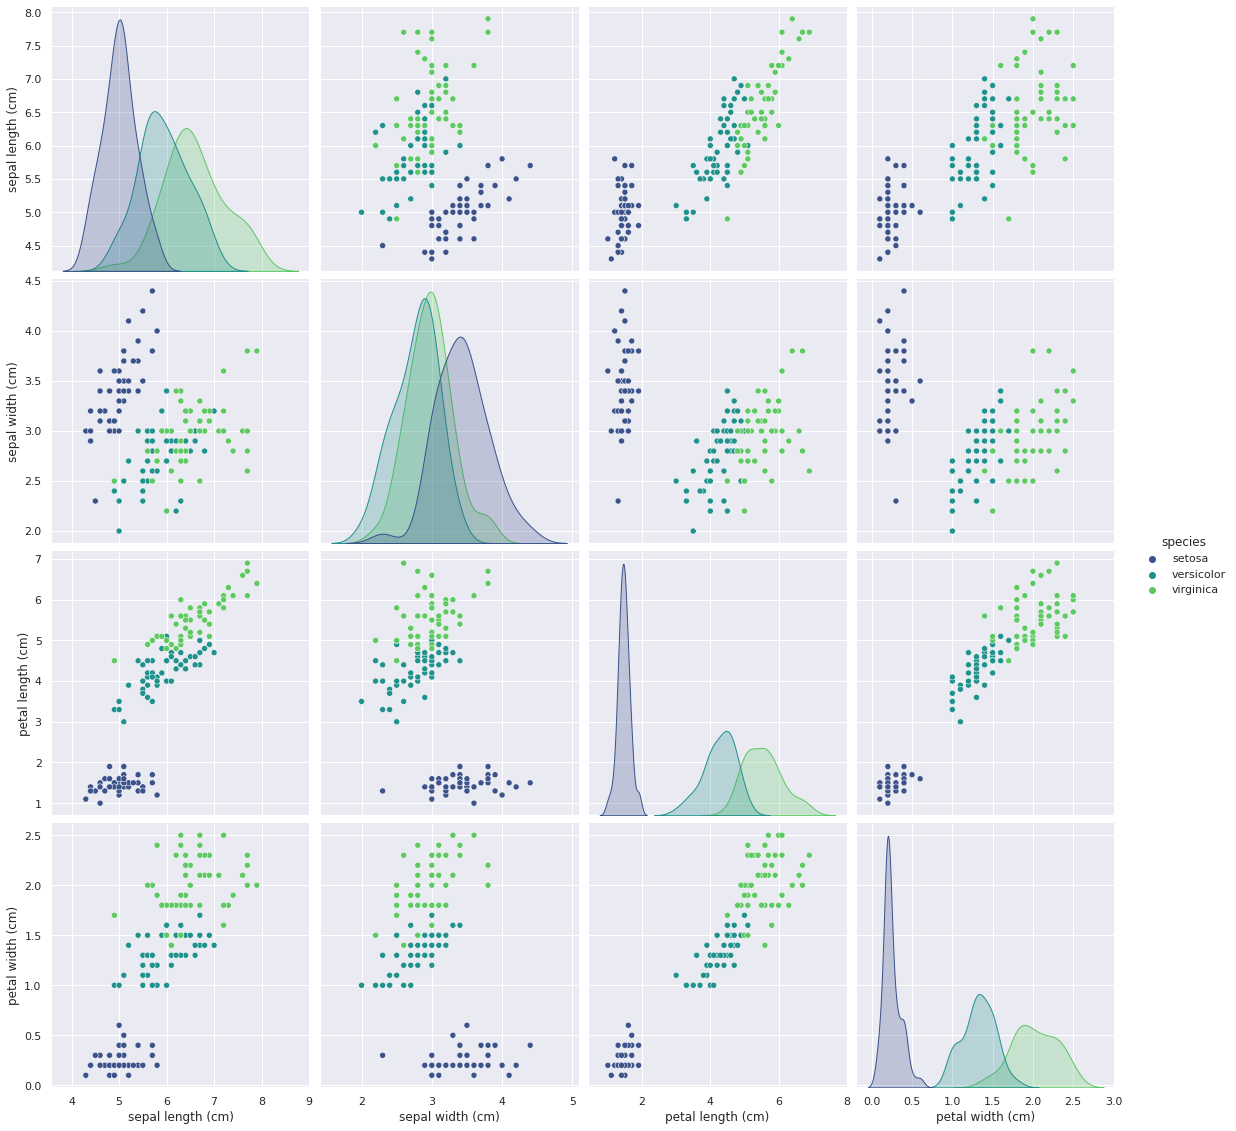

In [ ]:
# Bivariate analysis, Distribution of variables, Variability

sns.pairplot(iris_data, hue="species", palette="viridis", height=4)

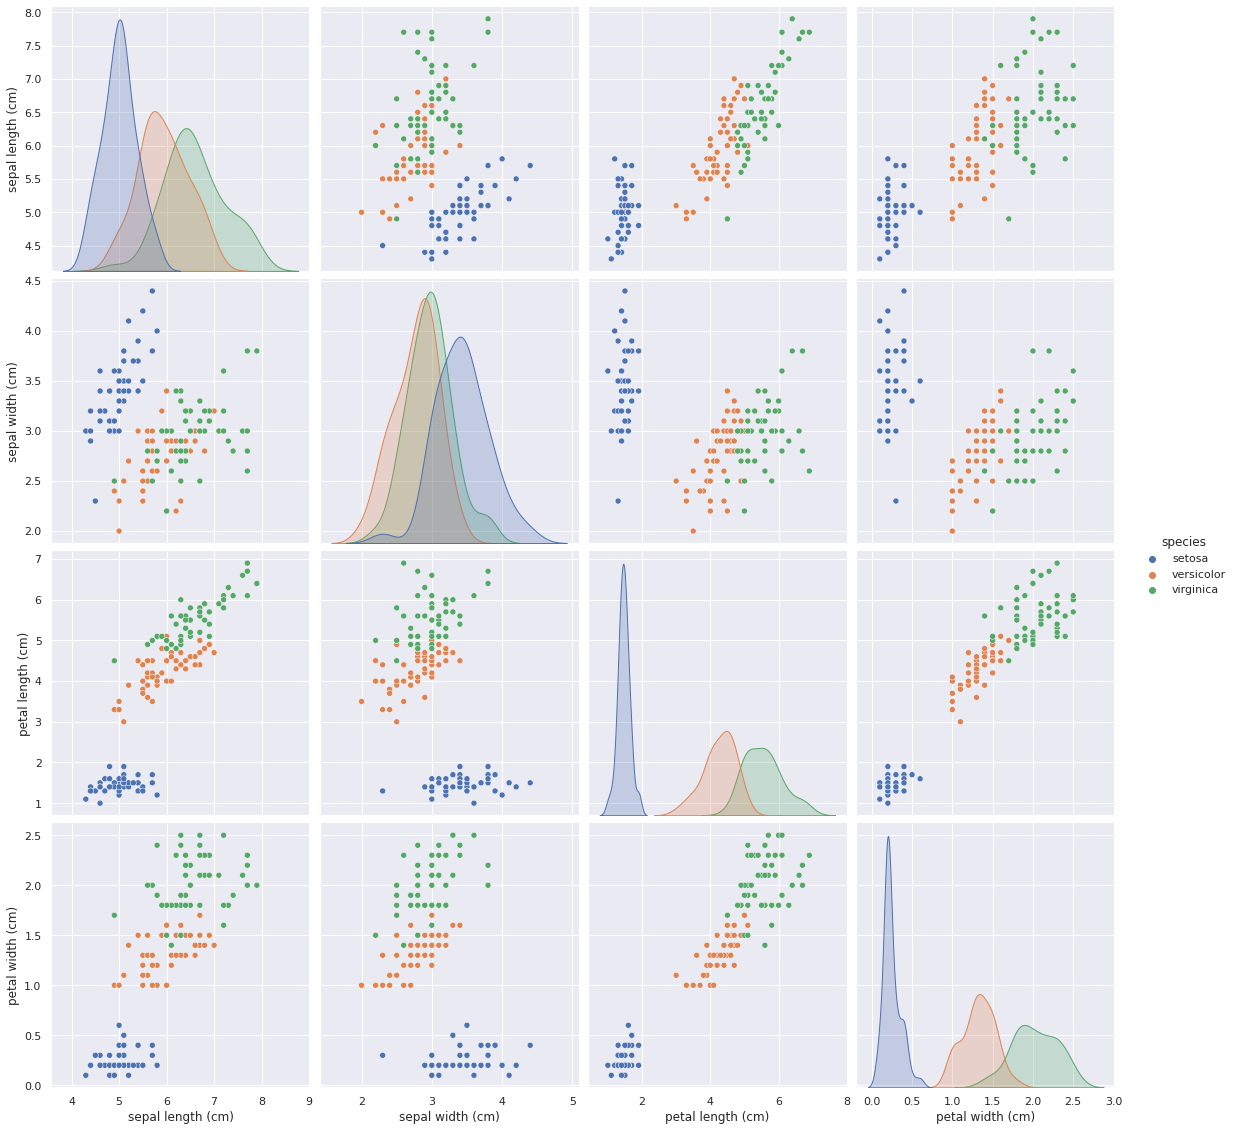

In [ ]:
sns.pairplot(iris_data, hue="species", height=4)

[]

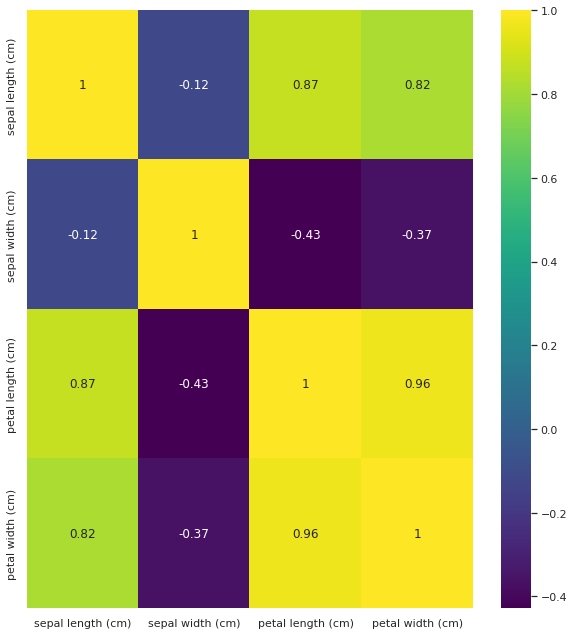

In [ ]:
plt.figure(figsize=(10,11))
sns.heatmap(iris_data.corr(), annot=True, cmap="viridis")
plt.plot()

[]

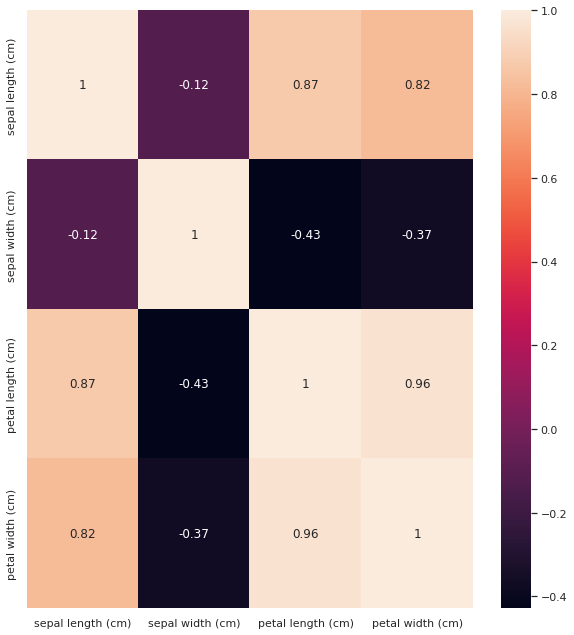

In [ ]:
plt.figure(figsize=(10,11))
sns.heatmap(iris_data.corr(), annot=True)
plt.plot()

In [ ]:
pca = decomposition.PCA(n_components=2)

# scaler = preprocessing.StandardScaler()
# data = scaler.fit_transform(iris_data[iris["feature_names"]])

pc = pca.fit_transform(iris_data[iris["feature_names"]])
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
pc_df["species"] = iris_data["species"]
pc_df

,PC1,PC2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


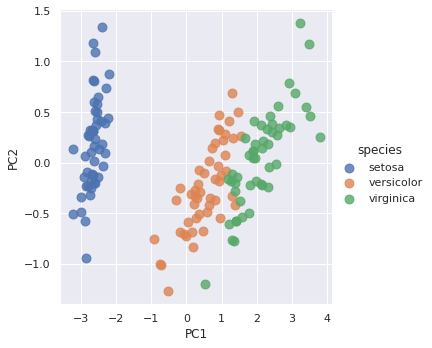

In [ ]:
sns.lmplot(x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='species', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size